### 1. 对新加入的变量进行分析

In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sn
import matplotlib.pyplot as plt
import pdvega
import warnings
warnings.filterwarnings('ignore')

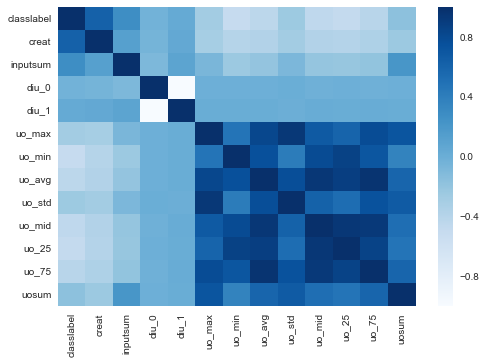

In [5]:
data = pd.read_csv('preprocessed_data.csv')
labelmat = data['classlabel']
datamat = data.drop(['classlabel'],axis=1)
data1 = data[['classlabel','creat','inputsum','diu_0','diu_1','uo_max',
                  'uo_min','uo_avg','uo_std','uo_mid','uo_25',
                  'uo_75','uosum']]
core1 = data1.corr()
sn.heatmap(core1,cmap="Blues")
plt.show()

In [6]:
core1

,classlabel,creat,inputsum,diu_0,diu_1,uo_max,uo_min,uo_avg,uo_std,uo_mid,uo_25,uo_75,uosum
classlabel,1.000000,0.617554,0.276081,-0.037423,0.037423,-0.274528,-0.496862,-0.429900,-0.245743,-0.457503,-0.484496,-0.407515,-0.168438
creat,0.617554,1.000000,0.126614,-0.047176,0.047176,-0.297617,-0.392327,-0.371857,-0.277397,-0.370335,-0.385557,-0.351080,-0.241837
inputsum,0.276081,0.126614,1.000000,-0.088947,0.088947,-0.075507,-0.240247,-0.196234,-0.084874,-0.203405,-0.214113,-0.188428,0.216624
diu_0,-0.037423,-0.047176,-0.088947,1.000000,-1.000000,-0.008807,-0.009221,-0.015581,0.001490,-0.017170,-0.015540,-0.016746,-0.015086
diu_1,0.037423,0.047176,0.088947,-1.000000,1.000000,0.008807,0.009221,0.015581,-0.001490,0.017170,0.015540,0.016746,0.015086
uo_max,-0.274528,-0.297617,-0.075507,-0.008807,0.008807,1.000000,0.470870,0.822515,0.930023,0.675062,0.595752,0.783454,0.713227
uo_min,-0.496862,-0.392327,-0.240247,-0.009221,0.009221,0.470870,1.000000,0.750312,0.419145,0.796577,0.862081,0.709631,0.365259
uo_avg,-0.429900,-0.371857,-0.196234,-0.015581,0.015581,0.822515,0.750312,1.000000,0.767247,0.944357,0.888787,0.968666,0.593733
uo_std,-0.245743,-0.277397,-0.084874,0.001490,-0.001490,0.930023,0.419145,0.767247,1.000000,0.611220,0.527647,0.740471,0.670418
uo_mid,-0.457503,-0.370335,-0.203405,-0.017170,0.017170,0.675062,0.796577,0.944357,0.611220,1.000000,0.940380,0.926949,0.519844


In [7]:
data.iloc[:,61:80].describe()

,uo_mid,uo_25,uo_75,uosum,gcs_max,gcs_min,gcs_avg,gcs_std,gcs_mid,gcs_25,gcs_75,height,weight,age,lostime,inputsum,type_0,type_1,type_2
count,8.315000e+03,8.315000e+03,8.315000e+03,8.315000e+03,8.315000e+03,8.315000e+03,8.315000e+03,8.315000e+03,8.315000e+03,8.315000e+03,8.315000e+03,8.315000e+03,8.315000e+03,8.315000e+03,8.315000e+03,8.315000e+03,8315.000000,8315.000000,8315.000000
mean,4.999851e-01,4.999328e-01,5.000256e-01,5.000080e-01,6.630730e-01,5.495906e-01,5.598177e-01,4.179963e-01,6.020645e-01,5.733859e-01,6.219326e-01,4.998277e-01,4.999795e-01,5.010159e-01,5.000007e-01,4.999956e-01,0.143836,0.823211,0.032952
std,2.885951e-01,2.886607e-01,2.886551e-01,2.887304e-01,3.978904e-01,3.698118e-01,3.559097e-01,3.694037e-01,3.837837e-01,3.718134e-01,3.895482e-01,2.784961e-01,2.887210e-01,2.904348e-01,2.887271e-01,2.887270e-01,0.350945,0.381513,0.178523
min,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,0.000000,0.000000,0.000000
25%,2.467467e-01,2.502503e-01,2.632633e-01,2.492492e-01,2.947948e-01,2.457457e-01,2.497418e-01,1.000000e-07,2.312312e-01,2.502503e-01,2.542543e-01,2.457457e-01,2.500501e-01,2.500365e-01,2.501815e-01,2.492492e-01,0.000000,1.000000,0.000000
50%,5.035035e-01,4.979980e-01,4.974975e-01,5.000000e-01,9.999999e-01,4.834835e-01,5.005005e-01,4.974975e-01,4.909910e-01,5.025025e-01,4.954955e-01,5.175175e-01,5.005005e-01,5.000542e-01,4.998745e-01,5.000000e-01,0.000000,1.000000,0.000000
75%,7.447447e-01,7.592593e-01,7.497497e-01,7.497497e-01,9.999999e-01,9.999999e-01,9.999999e-01,7.512513e-01,9.999999e-01,9.999999e-01,9.999999e-01,7.582583e-01,7.492492e-01,7.501184e-01,7.497986e-01,7.501015e-01,0.000000,1.000000,0.000000
max,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,1.000000,1.000000,1.000000


In [8]:
from sklearn.feature_selection import VarianceThreshold
sel_var = VarianceThreshold()
data_var = sel_var.fit_transform(datamat)
data_var
result = sel_var.get_support(indices=False)
eigens = ['creat', 'hr_max', 'hr_min', 'hr_avg', 'hr_std', 'hr_mid',
            'hr_25', 'hr_75', 'rr_max', 'rr_min', 'rr_avg', 'rr_std',
            'rr_mid', 'rr_25', 'rr_75', 'sbp_max', 'sbp_min', 'sbp_avg',
            'sbp_std', 'sbp_mid', 'sbp_25', 'sbp_75', 'dbp_max', 'dbp_min',
            'dbp_avg', 'dbp_std', 'dbp_mid', 'dbp_25', 'dbp_75', 'mbp_max',
            'mbp_min', 'mbp_avg', 'mbp_std', 'mbp_mid', 'mbp_25', 'mbp_75',
            'si_max', 'si_min', 'si_avg', 'si_std', 'si_mid', 'si_25', 'si_75',
            'spo2_max', 'spo2_min', 'spo2_avg', 'spo2_std', 'spo2_mid', 'spo2_25',
            'spo2_75', 'tem_max', 'tem_min', 'tem_avg', 'tem_std', 'tem_mid', 'tem_25',
            'tem_75', 'uo_max', 'uo_min', 'uo_avg', 'uo_std', 'uo_mid', 'uo_25', 'uo_75',
            'uosum', 'gcs_max', 'gcs_min', 'gcs_avg', 'gcs_std', 'gcs_mid', 'gcs_25', 'gcs_75',
            'height', 'weight', 'age', 'lostime', 'inputsum','type_0','type_1','type_2',
            'F', 'M', 'vaso_0', 'vaso_1', 'vent_0', 'vent_1', 'bmi_0', 'bmi_1','diu_0', 'diu_1']
# dataframe = pd.DataFrame(result.reshape(1,90),columns=eigens)
dataframe = pd.DataFrame(eigens)
dataframe[~result]

,0


### 2.Python做 K-S检验

In [78]:
from scipy.stats import ks_2samp
import numpy as np

data1 = data.loc[data['classlabel']==1,:]
data2 = data.loc[data['classlabel']==0,:]
datamat1 = data1.drop(['classlabel'],axis=1)
datamat2 = data2.drop(['classlabel'],axis=1)

n_features = datamat1.shape[1]
test = []
for i in range(n_features):
    test_tmp = ks_2samp(datamat1.iloc[:,i],datamat2.iloc[:,i])
    test.append(test_tmp.pvalue)
pvalues = np.array(test)

dis_P = pvalues[pvalues>0.05]
eigens = np.array(eigens)
keys = eigens[pvalues>0.05]
discard = pd.DataFrame(dis_P.reshape(1,5),columns=keys)
discard



,hr_min,rr_75,mbp_std,spo2_25,type_2
0,0.223389,0.14108,0.055973,0.08567,1.0


In [79]:
keys = eigens[pvalues>0.05]

In [77]:
np.array(eigens)

array(['creat', 'hr_max', 'hr_min', 'hr_avg', 'hr_std', 'hr_mid', 'hr_25',
       'hr_75', 'rr_max', 'rr_min', 'rr_avg', 'rr_std', 'rr_mid', 'rr_25',
       'rr_75', 'sbp_max', 'sbp_min', 'sbp_avg', 'sbp_std', 'sbp_mid',
       'sbp_25', 'sbp_75', 'dbp_max', 'dbp_min', 'dbp_avg', 'dbp_std',
       'dbp_mid', 'dbp_25', 'dbp_75', 'mbp_max', 'mbp_min', 'mbp_avg',
       'mbp_std', 'mbp_mid', 'mbp_25', 'mbp_75', 'si_max', 'si_min',
       'si_avg', 'si_std', 'si_mid', 'si_25', 'si_75', 'spo2_max',
       'spo2_min', 'spo2_avg', 'spo2_std', 'spo2_mid', 'spo2_25',
       'spo2_75', 'tem_max', 'tem_min', 'tem_avg', 'tem_std', 'tem_mid',
       'tem_25', 'tem_75', 'uo_max', 'uo_min', 'uo_avg', 'uo_std',
       'uo_mid', 'uo_25', 'uo_75', 'uosum', 'gcs_max', 'gcs_min',
       'gcs_avg', 'gcs_std', 'gcs_mid', 'gcs_25', 'gcs_75', 'height',
       'weight', 'age', 'lostime', 'inputsum', 'type_0', 'type_1',
       'type_2', 'F', 'M', 'vaso_0', 'vaso_1', 'vent_0', 'vent_1',
       'bmi_0', 'bmi_1', 

In [80]:
keys = dataframe[pvalues>0.05].values